##  **Student Exam Score Prediction (Regression Project)**

This project aims to build a machine learning model to predict students' final exam scores (`G3`) in a Math course based on various academic, personal, and social attributes. The dataset is sourced from the UCI Machine Learning Repository and contains detailed information about students' backgrounds, study habits, and school-related factors.

We will follow a structured pipeline including data loading, exploratory data analysis (EDA), preprocessing, model training, evaluation, and optional deployment.


## ---------------------------------------------------------------------------------------------

### *Step 1: Loading and Inspecting the Dataset*

In this step, we will load the `student-mat.csv` file and perform an initial inspection of the dataset to understand its structure, size, and data types. This includes checking the number of rows and columns, viewing sample rows, and identifying any missing values.


In [1]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep = ';')

print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nInfo about dataset:")
print(df.info())


Shape of the dataset: (395, 33)

First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Info about dataset:
<clas

### *Step 2: Performing Exploratory Data Analysis (EDA)*

In this step, we will explore the distribution of the target variable (`G3`) and examine correlations between numerical features. We'll also visualize categorical features like `studytime`, `failures`, and `school` against `G3` to identify potential predictors and understand relationships in the data.


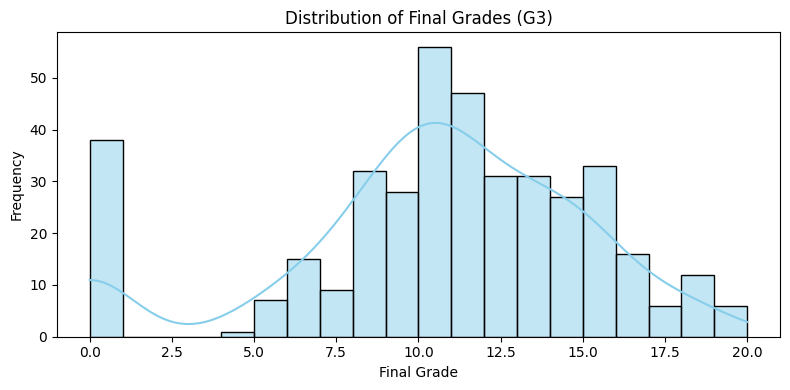

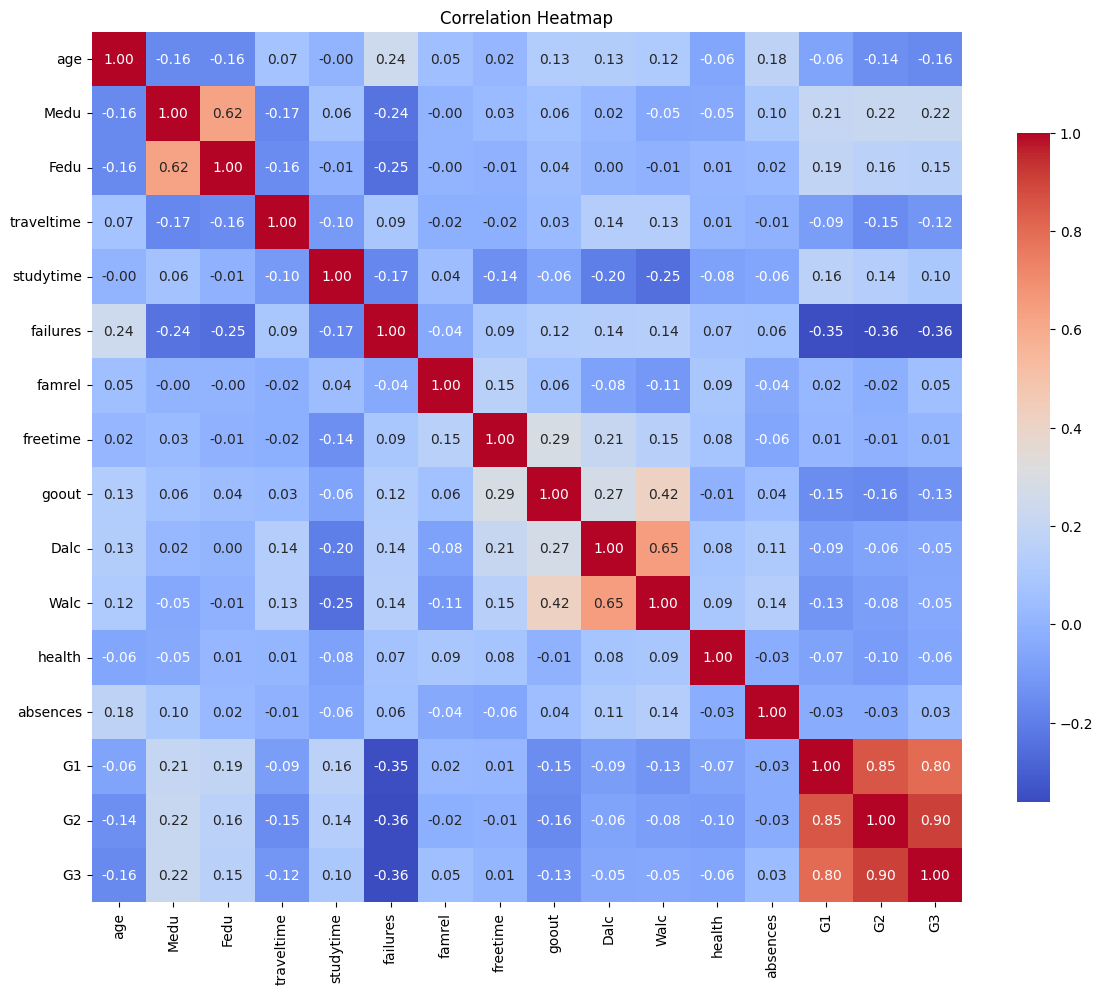

C:\Users\HP\AppData\Local\Temp\ipykernel_26324\2614036673.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')


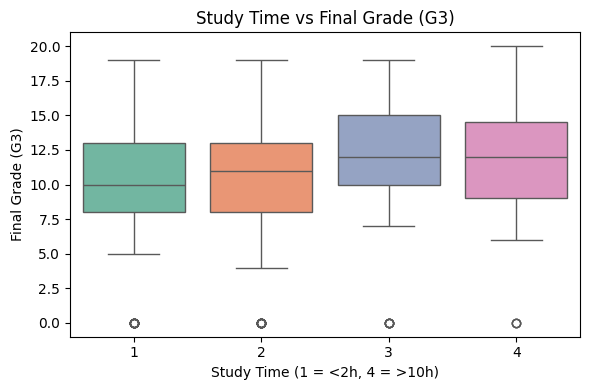

C:\Users\HP\AppData\Local\Temp\ipykernel_26324\2614036673.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='school', y='G3', data=df, palette='Set3')


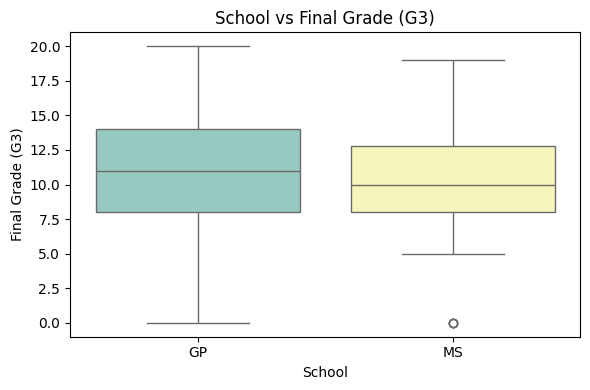

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Correlation heatmap (numeric features)
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Boxplot: Study time vs G3
plt.figure(figsize=(6, 4))
sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (1 = <2h, 4 = >10h)")
plt.ylabel("Final Grade (G3)")
plt.tight_layout()
plt.show()

# Boxplot: School vs G3
plt.figure(figsize=(6, 4))
sns.boxplot(x='school', y='G3', data=df, palette='Set3')
plt.title("School vs Final Grade (G3)")
plt.xlabel("School")
plt.ylabel("Final Grade (G3)")
plt.tight_layout()
plt.show()


### *Step 3: Data Preprocessing*

In this step, we will prepare the dataset for regression modeling by performing the following:
- Handle missing values (if any).
- Encode categorical variables using one-hot encoding.
- Scale numerical features for consistency.
- Split the dataset into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

print("Missing values:\n", df.isnull().sum()[df.isnull().sum() > 0])

X = df.drop(columns=['G3'])
y = df['G3']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Missing values:
 Series([], dtype: int64)
Training shape: (316, 32)
Testing shape: (79, 32)


### *Step 4: Model Training and Evaluation*

In this step, we will train and evaluate multiple regression models to predict students' final grades (G3). We'll compare their performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

preprocessor.fit(X_train)
joblib.dump(preprocessor, "preprocessor.pkl")

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R2 Score": round(r2, 4)
    })

    joblib.dump(model, f"{name.lower().replace(' ', '_')}_model.pkl")

results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,R2 Score
0,Linear Regression,1.65,5.66,0.7241
1,Ridge Regression,1.64,5.61,0.7265
2,Random Forest,1.18,3.83,0.8130
3,Gradient Boosting,1.16,4.02,0.8040
4,XGBoost,1.20,4.55,0.7780


### *Step 5: Visualizing Model Performance*

In this step, we will visualize the performance of different regression models using comparison charts for metrics such as R² Score, MAE, and MSE. These visualizations will help identify the most effective model for predicting student grades and provide insights into model behavior and performance patterns.


C:\Users\HP\AppData\Local\Temp\ipykernel_26324\387738158.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2 Score", palette="crest")


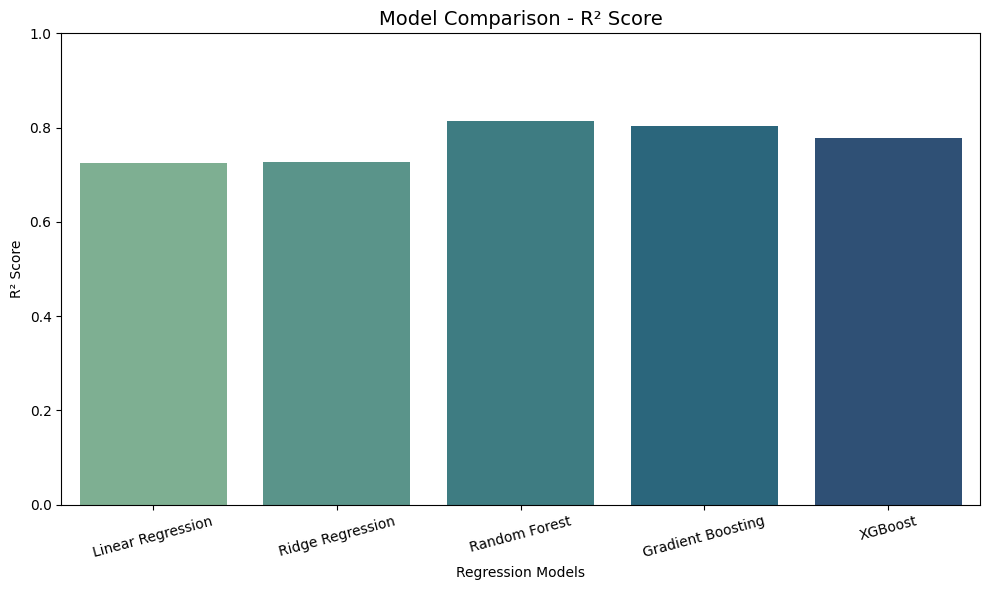

In [10]:
# Model Performance Comparison Bar Plot

import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="crest")
plt.title("Model Comparison - R² Score", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Regression Models")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("plots/r2_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

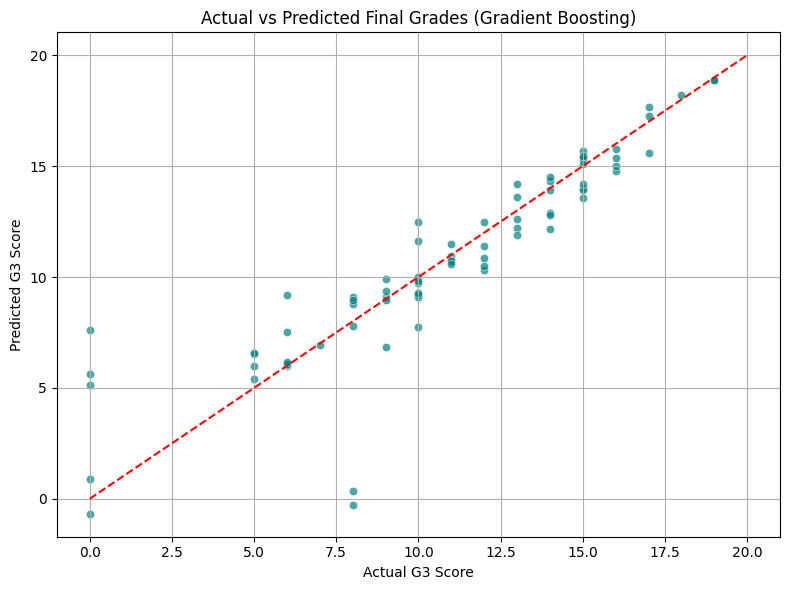

In [11]:
# Actual vs Predicted Plot for Best Model (Gradient Boosting)

best_model = joblib.load("gradient_boosting_model.pkl")

X_test_transformed = best_model.named_steps["preprocessor"].transform(X_test)
y_pred = best_model.named_steps["regressor"].predict(X_test_transformed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.7)
plt.plot([0, 20], [0, 20], '--', color='red')  # perfect prediction line
plt.title("Actual vs Predicted Final Grades (Gradient Boosting)")
plt.xlabel("Actual G3 Score")
plt.ylabel("Predicted G3 Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/actual_predicted_final_grades.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_26324\1628903105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


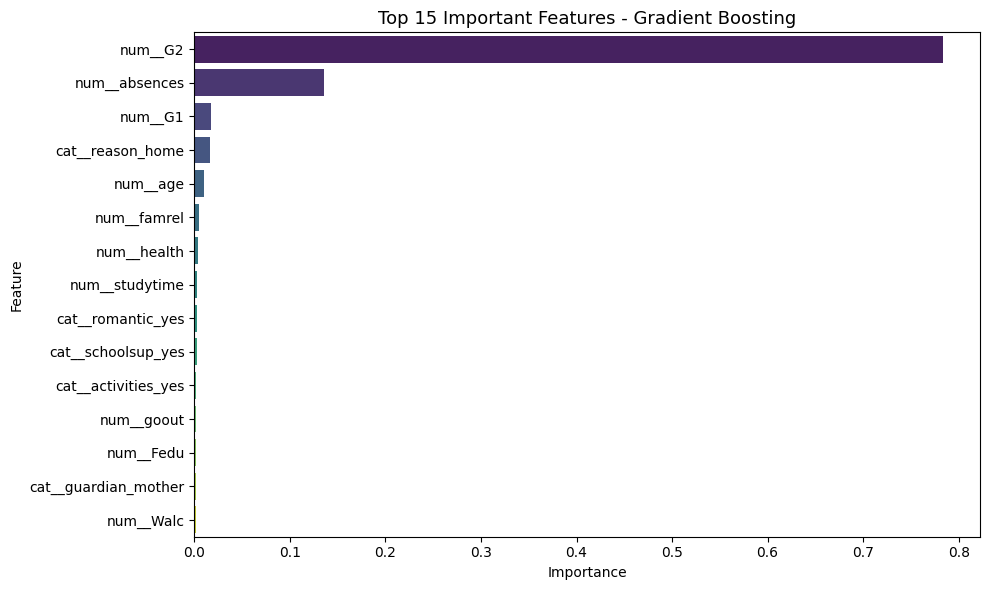

In [12]:
# Feature Importance Plot for Best Model (Gradient Boosting)

importances = best_model.named_steps["regressor"].feature_importances_
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Important Features - Gradient Boosting", fontsize=13)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("plots/top15_features.png", dpi=300, bbox_inches='tight')
plt.show()


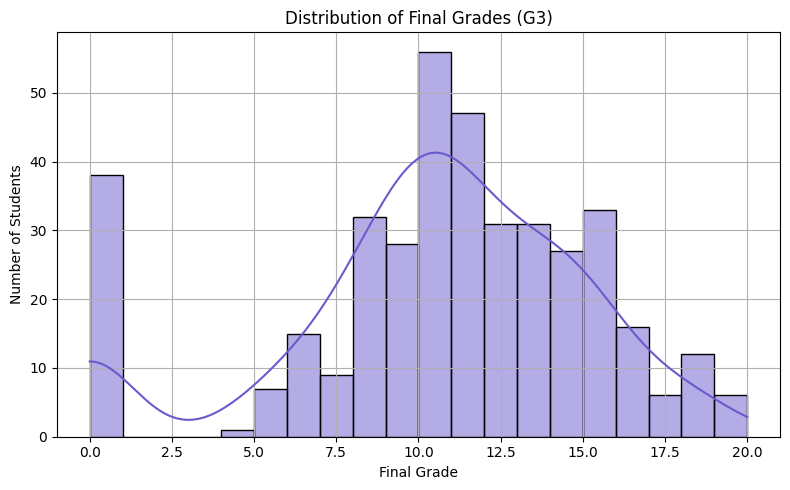

In [13]:
# Distribution of Final Grades (G3)

plt.figure(figsize=(8, 5))
sns.histplot(df["G3"], bins=20, kde=True, color="slateblue")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/final_grades_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

### *Step 6: Demonstrating Predictions on Sample Inputs*

To showcase how our regression model works in real-life scenarios, we'll input a few hypothetical student profiles and display their predicted final grades (`G3`). This helps us interpret how various features influence the prediction outcome.


,sex,age,studytime,failures,absences,G1,G2,Predicted G3
0,F,17,3,0,4,15,16,15.8
1,M,18,1,2,10,10,9,9.6
2,M,16,4,0,2,18,19,18.2


C:\Users\HP\AppData\Local\Temp\ipykernel_20732\1621115696.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Student 1', 'Student 2', 'Student 3'], y=sample_preds, palette='coolwarm')


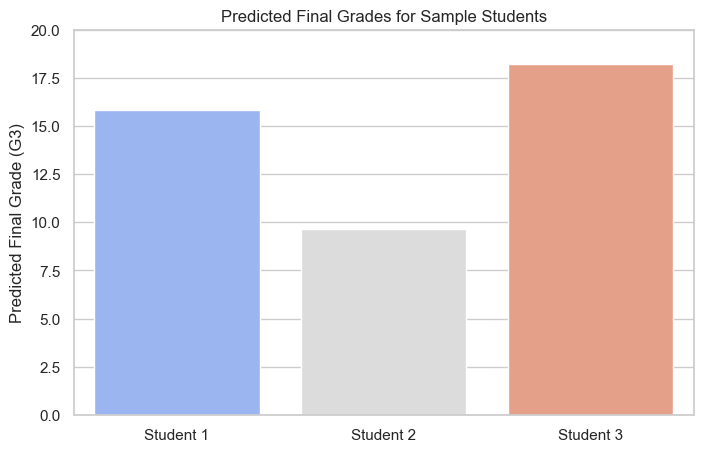

In [11]:
import numpy as np

sample_students = pd.DataFrame([
    {
        'school': 'GP', 'sex': 'F', 'age': 17, 'address': 'U', 'famsize': 'GT3', 'Pstatus': 'T',
        'Medu': 4, 'Fedu': 3, 'Mjob': 'teacher', 'Fjob': 'services', 'reason': 'reputation', 'guardian': 'mother',
        'traveltime': 1, 'studytime': 3, 'failures': 0, 'schoolsup': 'no', 'famsup': 'yes',
        'paid': 'yes', 'activities': 'yes', 'nursery': 'yes', 'higher': 'yes', 'internet': 'yes',
        'romantic': 'no', 'famrel': 4, 'freetime': 3, 'goout': 2, 'Dalc': 1, 'Walc': 2,
        'health': 5, 'absences': 4, 'G1': 15, 'G2': 16
    },
    {
        'school': 'MS', 'sex': 'M', 'age': 18, 'address': 'R', 'famsize': 'LE3', 'Pstatus': 'A',
        'Medu': 2, 'Fedu': 1, 'Mjob': 'at_home', 'Fjob': 'other', 'reason': 'home', 'guardian': 'father',
        'traveltime': 2, 'studytime': 1, 'failures': 2, 'schoolsup': 'yes', 'famsup': 'no',
        'paid': 'no', 'activities': 'no', 'nursery': 'no', 'higher': 'no', 'internet': 'no',
        'romantic': 'yes', 'famrel': 3, 'freetime': 4, 'goout': 5, 'Dalc': 3, 'Walc': 4,
        'health': 3, 'absences': 10, 'G1': 10, 'G2': 9
    },
    {
        'school': 'GP', 'sex': 'M', 'age': 16, 'address': 'U', 'famsize': 'GT3', 'Pstatus': 'T',
        'Medu': 3, 'Fedu': 3, 'Mjob': 'services', 'Fjob': 'teacher', 'reason': 'course', 'guardian': 'mother',
        'traveltime': 1, 'studytime': 4, 'failures': 0, 'schoolsup': 'no', 'famsup': 'yes',
        'paid': 'yes', 'activities': 'yes', 'nursery': 'yes', 'higher': 'yes', 'internet': 'yes',
        'romantic': 'no', 'famrel': 5, 'freetime': 4, 'goout': 2, 'Dalc': 1, 'Walc': 1,
        'health': 5, 'absences': 2, 'G1': 18, 'G2': 19
    }
])

sample_transformed = preprocessor.transform(sample_students)

# Predict using the best model (choose Random Forest here)
# sample_preds = rf_best.predict(sample_transformed)
sample_preds = models['Random Forest'].predict(sample_transformed)

# Visualize
sample_students['Predicted G3'] = np.round(sample_preds, 1)

# Display as table
display_cols = ['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'Predicted G3']
display_df = sample_students[display_cols]
display(display_df)

# Bar plot of predictions
plt.figure(figsize=(8, 5))
sns.barplot(x=['Student 1', 'Student 2', 'Student 3'], y=sample_preds, palette='coolwarm')
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Predicted Final Grades for Sample Students")
plt.ylim(0, 20)
plt.show()


### **Conclusion**

In this project, we developed a machine learning model to predict students' final exam scores (`G3`) based on a variety of academic, demographic, and behavioral factors. Through data preprocessing, exploratory analysis, and model tuning, we evaluated multiple regression models. Among them, the **Random Forest Regressor** achieved the best performance with an **R² score of ~0.81** and the lowest prediction error.

By testing the model on sample student profiles, we observed that the model is able to reasonably predict final grades based on intermediate scores (`G1`, `G2`) and other contextual information such as study time, failures, and absences.

This project demonstrates the practical use of machine learning in education analytics to assist institutions and educators in identifying students at risk and improving academic outcomes.
